### Задание 1

In [1]:
# Установка razdel: ее нет в Colab по умолчанию
!pip install razdel

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\jingni\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Регулярные выражения потребуются для очистки текста
import re

from razdel import sentenize

# Без torch невозможна работа с нейросетями
import torch

# Библиотека transformers нужна для работы с нейросетями-трансформерами,
# которые мы будем использовать для анализа тональности
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Библиотека matplotlib позволит построить графики кривых тональности
from matplotlib import pyplot as plt

# Фильтр Савицкого-Голея понадобится нам для обработки результатов,
# которая будет описана позже
from scipy.signal import savgol_filter

C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Прочитаем текст из целевого файла.
# Не забудьте загрузить его, используя вкладку "Файлы" слева сбоку
with open('text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
# ВАШ КОД ЗДЕСЬ

In [4]:
import unicodedata
a = unicodedata.category(".").startswith("P")
a

True

In [5]:
def clean_text(text: str) -> str:
    # Заменяем переносы строк на пробелы, убираем лишние пробелы

    # ВАШ КОД ЗДЕСЬ
    for i in range(len(text)):
        if text[i] == "\n" and unicodedata.category(text[i-1]).startswith("P"):
            #print('aaaa')
            text = text.replace(text[i], ' ')
        elif  text[i] == "\n":
            text = text.replace(text[i], '. ')


    #cleaned_text = ...

    return text

In [6]:
# Очистим текст
cleaned_text = clean_text(text)

In [7]:
with open('cleaned.txt', 'w', encoding='utf-8') as f:
    f.write(cleaned_text)


In [8]:
cleaned_text

'Гарри Поттер и философский камень. . Глава 1. МАЛЬЧИК, КОТОРЫЙ ВЫЖИЛ. Мистер и миссис Дурсли проживали в доме номер четыре по Тисовой улице и всегда с гордостью заявляли, что они, к счастью, абсолютно нормальные люди. Уж от кого-кого, аот них никак нельзя было ожидать, чтобы они попали в какую-нибудь странную или загадочную историю. Мистер и миссис Дурсли весьма неодобрительно относились к любым странностям, загадкам и прочей ерунде.. Мистер Дурсль возглавлял фирму под названием «Граннингс», которая специализировалась на производстве дрелей. Это был полный мужчина с очень пышными усами и оченькороткой шеей. Что же касается миссис Дурсль, она была тощей блондинкой с шеей почти вдвое длиннее, чем положено при ее росте. Однако этот недостаток пришелся ей весьма кстати, поскольку большую часть времени миссис Дурсль следила за соседями и подслушивала их разговоры. А с такой шеей, как у нее, было очень удобно заглядывать за чужие заборы. У мистера и миссис Дурслей был маленький сын по имени

Чтобы провести динамический анализ тональности, нужно разбить текст на атомарные единицы, которые будут подаваться на вход нейросети. Они не должны быть слишком маленькими, так как в этом случае модель перестанет чувствовать контекст и потеряет своё главное преимущество перед словарём. Они не должны быть и слишком большими, так как размерности входного слоя нейросети может не хватить. В случае книг в качестве этих атомарных единиц лучше всего использовать предложения. Предложения достаточно маленькие по размеру, но выражают законченную мысль.

In [ ]:
# Разобьем текст на предложения (используйте функцию sentenize) и загрузим их в список
sentences = []


# ВАШ КОД ЗДЕСЬ
sentences = list(sentenize(cleaned_text))
sentences

In [10]:
sentences[0].text

'Гарри Поттер и философский камень. .'

In [11]:
# Загрузим модель с сайта HuggingFace и создадим ее экземпляр.
# Возможно модели нужно будет скачаться в Colab, нужно подождать.
model_checkpoint = 'cointegrated/rubert-tiny-sentiment-balanced'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
if torch.cuda.is_available():
    model.cuda()

# Сложная функция, которая заставит модель работать
def estimate_sentiment(messages: list) -> list:
    sentiment_out = []
    for text in messages:
        #print(text, "=====")
        with torch.no_grad():
            inputs = tokenizer(text.text, return_tensors='pt', truncation=True, padding=True).to(model.device)
            proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()[0]
            sentiment_out.append(proba.dot([-1, 0, 1]))
    return sentiment_out

In [12]:
# Произведем нейросетевую оценку тональности
sentiments = estimate_sentiment(sentences)

In [22]:
len(sentiments)

675

Text(0, 0.5, 'Тональность')

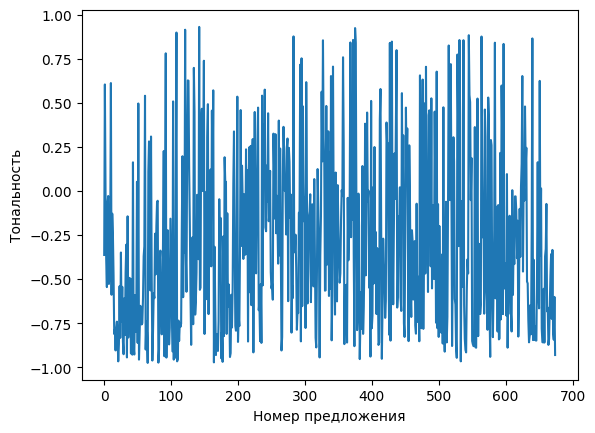

In [23]:
# Построим график кривой эмоциональной тональности с помощью matplotlib.
# Укажите разрешение графика 150, название оси X — "Номер предложения", оси Y — "Тональность". Добавьте отображение сетки.
figsize=(50, 3)
plt.plot(sentiments)
plt.xlabel('Номер предложения')
plt.ylabel('Тональность')
# ВАШ КОД ЗДЕСЬ

In [29]:
import numpy as np

Получилось не очень понятно и наглядно. При внимательном рассмотрении можно разглядеть очертания некоторой формы, сильно искажённой скачками и перепадами. Дело в том, что тональность предложений внутри текста может испытывать резкие перепады, а нейросеть может иногда ошибаться. В результате  возникают шумы и некоторая неустойчивость оценки.  


Проблему можно было бы решить, используя в качестве атомарных единиц фрагменты текста большего размера, например, главы. Это не универсальный подход, так как его результаты станут сильно разниться в зависимости от объёмов текста. Решим задачу более изящно и применим фильтры, пришедшие к нам из теории обработки сигналов и призванные отделять полезный сигнал от шумов, которые возникают при его передаче. Выберем фильтр Савицкого-Голея. Этот фильтр уже реализован в Python, мы импортировали его в самом начале.

Text(0, 0.5, 'Тональность')

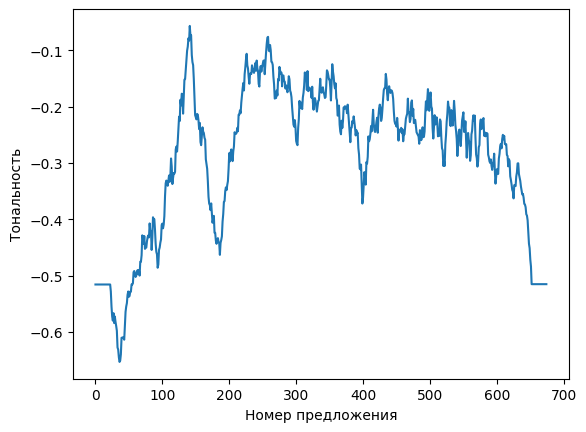

In [36]:
# Произведем фильтрацию сигнала фильтром Савицкого-Голея
filtered_sentiments = savgol_filter(sentiments, window_length=len(sentiments)//15, polyorder=0)

# Заново постройте график кривой эмоциональной тональности с теми же настройками.
figsize=(50, 3)
plt.plot(filtered_sentiments)
plt.xlabel('Номер предложения')
plt.ylabel('Тональность')
# ВАШ КОД ЗДЕСЬ

У фильтра Савицкого-Голея есть параметр ``window_length``, который отвечает за размер окна сглаживания. Выбранное нами по умолчанию значение даёт хорошую картинку, но результаты использования фильтра во многом зависят от выбранного размера окна. 

Малые окна сглаживают высокочастотный шум, устраняя мелкие флуктуации, а большие окна сглаживают более крупные колебания и тренды сигнала, оставляя только общие тенденции его поведения. Как найти баланс между размерами окна?

Чтобы получить более гладкую кривую, учитывающую основные тренды исходного графика, можно использовать ансамблевый фильтр. Для этого нужно параллельно обработать зашумлённую кривую несколькими фильтрами Савицкого-Голея с различными размером окна, после чего усреднить результаты всех фильтров. Предполагается, что наиболее значимые изгибы зашумленной кривой тональности окажутся наиболее устойчивыми к сглаживанию большинства фильтров, поэтому будут отражены в окончательном результате.

In [49]:
import math

In [52]:
# Ансамблевый фильтр
def ensemble_filter(data: list, n_filters=100, polyorder=0, **savgol_args) -> list:
    """
    Применяет ансамблевый фильтр к входным данным

    Parameters:
    data (list): входной массив данных
    n_filters (int, optional): число фильтров, участвующих в сглаживании
    """
    # Заведите переменную, в которую будете собирать сумму результатов работы фильтров Савицкого-Голея.
    # Вам нужно будет поочерёдно перебирать значения window_length для того, чтобы обработать кривую тональности разными фильтрами.
    # Задайте стартовое и конечное значения window_length, а также шаг изменения, поделённый на n_filters (чтобы значение шага было меньше единицы по итогу).
    # Если шаг получается дробным, округлите его до целого числа вверх.
    # Затем в цикле пройдитесь по всем значениям window_length, обработайте фильтром Савицкого-Голея данные и приплюсуйте все значения в стартовую переменную.
    # В качестве результата функции верните стартовую переменную, разделённую на n_filters.
    start = 0
    end = 20
    step = 10
    windows_lens = [math.ceil(step/n_filters) for i in range(1, len(data)//20)]
    for i in windows_lens:
        start += savgol_filter(data, window_length=i, polyorder=0)
    return start/n_filters

    # ВАШ КОД ЗДЕСЬ

Text(0, 0.5, 'Тональность')

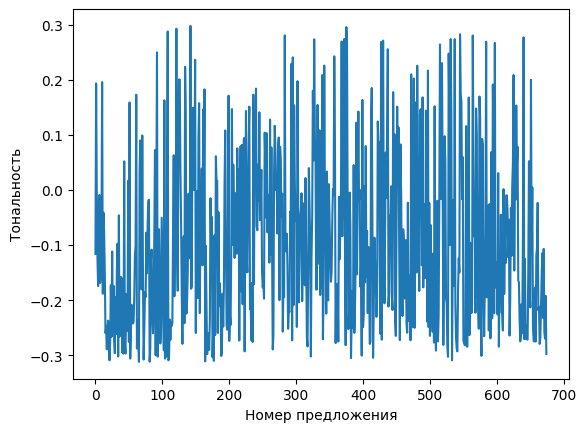

In [54]:
# Произведем фильтрацию сигнала ансамблевым фильтром
ensemble_filter(data=sentiments)
# ВАШ КОД ЗДЕСЬ
figsize=(50, 3)
plt.plot(ensemble_filter(data=sentiments))
plt.xlabel('Номер предложения')
plt.ylabel('Тональность')
# Заново постройте график кривой эмоциональной тональности с теми же настройками.

# ВАШ КОД ЗДЕСЬ

### Задание 2

Выберите несколько похожих на ваш взгляд произведений: одного автора, с похожим сюжетом или части одной серии. Проанализируйте их по очереди и отобразите кривые тональности на общем графике. Проанализируйте этот график и опишите ваши выводы. Обратите внимание: произведения должны быть примерно равны по длине либо необходимо пропорционально сжать/растянуть графики.

### Задание 3

Попробуйте использовать другую модель с [HuggingFace](https://huggingface.co/models), выбрав такую, чтобы она была преобучена на русском языке и работала с анализом тональности. Сравните результаты, отличаются ли они?